原始数据集部分数据：
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.

<ipython-input-11-ca467eab7906>:40: UserWarning: Glyph 32553 (\N{CJK UNIFIED IDEOGRAPH-7F29}) missing from current font.
  plt.tight_layout()
<ipython-input-11-ca467eab7906>:40: UserWarning: Glyph 25918 (\N{CJK UNIFIED IDEOGRAPH-653E}) missing from current font.
  plt.tight_layout()
<ipython-input-11-ca467eab7906>:40: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from current font.
  plt.tight_layout()
<ipython-input-11-ca467eab7906>:40: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  plt.tight_layout()
<ipython-input-11-ca467eab7906>:40: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
<ipython-input-11-ca467eab7906>:40: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  plt.tight_layout()
<ipython-input-11-ca467eab7906>:40: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  plt.tight_layout()
<ipyth

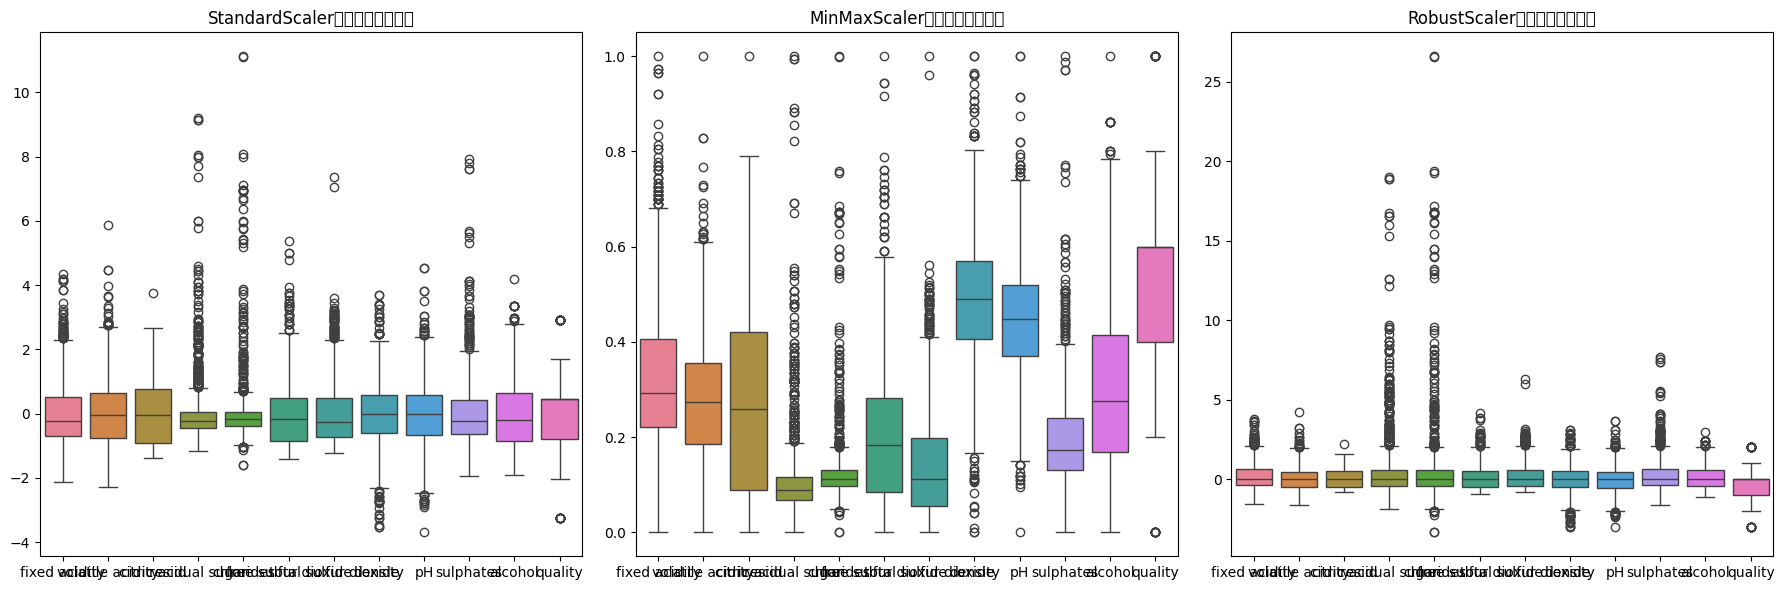

In [11]:
# 在Colab中运行此代码
# 安装必要的库
!pip install pandas matplotlib seaborn scikit-learn

# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 加载Wine Quality数据集
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=';')

# 显示部分数据
print("原始数据集部分数据：")
print(data.head())

# 1. 特征缩放（至少三种方式）
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

scaled_data = {}
for name, scaler in scalers.items():
    scaled_data[name] = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    print(f"\n使用{name}缩放后的数据集：")
    print(scaled_data[name].head())

# 生成图片结果
plt.figure(figsize=(18, 6))
for i, (name, df) in enumerate(scaled_data.items(), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df)
    plt.title(f"{name}缩放后的数据分布")

plt.tight_layout()
plt.show()


In [12]:
# 数值特征的异常值处理
from sklearn.ensemble import IsolationForest

# 使用IsolationForest来检测异常值
iso = IsolationForest(contamination=0.1, random_state=42)
yhat = iso.fit_predict(data)
mask = yhat != -1
data_no_outliers = data[mask]

print("\n删除异常值后的数据集：")
print(data_no_outliers.head())

# 替换异常值（例如使用中位数）
data_replaced_outliers = data.copy()
for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[column].median()
    data_replaced_outliers[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), median, data[column])

print("\n替换异常值后的数据集：")
print(data_replaced_outliers.head())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



删除异常值后的数据集：
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      

In [13]:
# 示例：假设我们有一个文本特征
data_with_text = data.copy()
text_features = ['good', 'bad', 'excellent', 'poor', 'average']
# 扩展text_features数组以匹配数据集的长度
data_with_text['text_feature'] = [text_features[i % len(text_features)] for i in range(len(data))]

print("\n包含非标准特征的数据集：")
print(data_with_text.head())

# 对文本特征进行编码
data_with_text['text_feature_encoded'] = data_with_text['text_feature'].astype('category').cat.codes
print("\n编码后的非标准特征：")
print(data_with_text[['text_feature', 'text_feature_encoded']].head())



包含非标准特征的数据集：
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality text_feature  
0      9.4        5         good  
1 

In [15]:
# 4. 特征选择
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier

# 过滤方法
X = data.drop('quality', axis=1)
y = data['quality']

select_k_best = SelectKBest(score_func=chi2, k=5)
X_new = select_k_best.fit_transform(X, y)
print("\n过滤方法选择的特征：")
print(X.columns[select_k_best.get_support()])

# 包装方法
# 使用随机森林模型进行RFE
model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=5)
fit = rfe.fit(X, y)
print("\n包装方法选择的特征：")
print(X.columns[fit.support_])

# 嵌入方法
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[-5:]
print("\n嵌入方法选择的特征：")
print(X.columns[indices])



过滤方法选择的特征：
Index(['volatile acidity', 'citric acid', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol'],
      dtype='object')

包装方法选择的特征：
Index(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')

嵌入方法选择的特征：
Index(['density', 'volatile acidity', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')
